In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/ModernDataScience_Project/data'

/content/gdrive/MyDrive/Colab Notebooks/ModernDataScience_Project/data


In [3]:
import pandas as pd
tweets  = pd.read_csv('cancer effective vaccine.csv')

In [4]:
tweets .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14323 entries, 0 to 14322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14323 non-null  int64 
 1   Date        14323 non-null  object
 2   User        14323 non-null  object
 3   Tweet       14323 non-null  object
dtypes: int64(1), object(3)
memory usage: 447.7+ KB


In [7]:
tweets.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-03-12 22:32:02+00:00,tightwines,@SandraWeeden This is short-term!\nThey are ho...
1,1,2023-03-12 22:21:12+00:00,PPatrick007,@backtolife_2023 Just adopt the theory everyth...
2,2,2023-03-12 18:17:31+00:00,DNeviles,@ClownWorld_ It's the Same Science that calls ...
3,3,2023-03-12 16:07:34+00:00,o_xpqx_o,@WashburneAlex Collin Powell suffered from a f...
4,4,2023-03-12 14:22:23+00:00,jneill,@ImKatieRN @dann58638436 @ShaneAKAProp @jimeek...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
tweets[tweets['Tweet'].duplicated(keep=False)].sort_values('Tweet').head(10)

,Unnamed: 0,Date,User,Tweet
2234,2234,2022-03-21 19:13:13+00:00,Nick_Carmody,"""Sunk Cost Fallacy"" will lead to the politiciz..."
2235,2235,2022-03-21 19:13:13+00:00,Nick_Carmody,"""Sunk Cost Fallacy"" will lead to the politiciz..."
10626,10626,2017-02-09 15:30:56+00:00,PolicyLabCHOP,#HPV #vaccines are an effective #cancer preven...
10622,10622,2017-02-14 18:01:45+00:00,PolicyLabCHOP,#HPV #vaccines are an effective #cancer preven...
10617,10617,2017-02-24 18:01:49+00:00,PolicyLabCHOP,#HPV #vaccines are an effective #cancer preven...
11566,11566,2015-02-15 23:38:00+00:00,greg_folkers,#HPV vaccine highly effective against multiple...
11544,11544,2015-02-17 14:20:18+00:00,greg_folkers,#HPV vaccine highly effective against multiple...
12694,12694,2013-10-22 13:37:28+00:00,GuyFraker,#Q: Would U own #stock in a #pharma co. w/ a v...
12695,12695,2013-10-22 13:37:27+00:00,get2kno_news,#Q: Would U own #stock in a #pharma co. w/ a v...
11280,11280,2015-09-17 21:24:02+00:00,Primary_Care_,#US #herbs (Reuters) - Advaxis Inc said its ex...


In [ ]:
tweets = tweets.drop_duplicates('Tweet')

In [ ]:
tweets.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-03-12 22:32:02+00:00,tightwines,@SandraWeeden This is short-term!\nThey are ho...
1,1,2023-03-12 22:21:12+00:00,PPatrick007,@backtolife_2023 Just adopt the theory everyth...
2,2,2023-03-12 18:17:31+00:00,DNeviles,@ClownWorld_ It's the Same Science that calls ...
3,3,2023-03-12 16:07:34+00:00,o_xpqx_o,@WashburneAlex Collin Powell suffered from a f...
4,4,2023-03-12 14:22:23+00:00,jneill,@ImKatieRN @dann58638436 @ShaneAKAProp @jimeek...


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import string

# Remove URLs from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove HTML tags from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

# Remove punctuation from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove smileys from a specific column
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]+', '', x))

# Convert Text in a specific column to lowercase
tweets['Tweet'] = tweets['Tweet'].str.lower()

# Remove newline characters from a specific column
tweets['Tweet'] = tweets['Tweet'].str.replace('\n', '')

# Remove "@" symbol from a specific column
tweets['Tweet'] = tweets['Tweet'].str.replace('@', '')

<ipython-input-9-4cab404ab3a7>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweets['Tweet'] = tweets['Tweet'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())


In [ ]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=9ffae49a8b501528477c666082cdf8bcb644e12ffe9cca5bc4e07fbe149f1df9
  Stored in directory: /root/.cache/pip/wheels/93/95/a9/c292c9dd8cadb8f2359f1670ff198a40d47167b0be3236e1c8
Successfully built langid


In [ ]:
import langid

# Identify the language of each row in a specific column
tweets['language'] = tweets['Tweet'].apply(lambda x: langid.classify(x)[0])

# Keep only the rows where the language is English
tweets = tweets[tweets['language'] == 'en']

# Remove the language column
tweets = tweets.drop(columns=['language'])

In [ ]:
tweets.head(10)

,Unnamed: 0,Date,User,Tweet
0,0,2023-03-12 22:32:02+00:00,tightwines,sandraweeden this is shorttermthey are hoping ...
1,1,2023-03-12 22:21:12+00:00,PPatrick007,backtolife2023 just adopt the theory everythin...
2,2,2023-03-12 18:17:31+00:00,DNeviles,clownworld its the same science that calls an ...
3,3,2023-03-12 16:07:34+00:00,o_xpqx_o,washburnealex collin powell suffered from a fo...
4,4,2023-03-12 14:22:23+00:00,jneill,imkatiern dann58638436 shaneakaprop jimeekay t...
5,5,2023-03-12 14:05:03+00:00,dann58638436,jneill shaneakaprop jimeekay tbd77 dylanhalacy...
6,6,2023-03-11 16:51:55+00:00,chrisas82324768,xrpimpin 9newsmelb emilyrice28 hilarious just ...
7,7,2023-03-11 12:04:40+00:00,RobertSapiro9,are people starting to realize the experimenta...
8,8,2023-03-11 11:45:00+00:00,7NewsBrisbane,australian researchers are a step closer to di...
9,9,2023-03-11 11:45:00+00:00,7NewsAdelaide,australian researchers are a step closer to di...


In [ ]:
tweets.shape

(13385, 4)

In [ ]:
#remove stopwords, punctuations, lemmatize and tokenize word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
tweets.Tweet = tweets.Tweet.apply(furnished)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
tweets.sample(5)

,Unnamed: 0,Date,User,Tweet
12793,12793,2013-05-12 16:59:44+00:00,NewsStories24,comparative analysis cancer vaccine setting se...
1142,1142,2022-10-20 09:26:17+00:00,TomABellamy,shawnvandenberg drjamesolsson misinformation i...
1087,1087,2022-11-02 08:07:21+00:00,rudicheu,1 meat cause cancer2 masturbation healthy3 nee...
12530,12530,2014-03-05 09:05:09+00:00,cancrdaily,cancerfighting effective vaccine way health ca...
1610,1610,2022-07-29 16:43:09+00:00,RonDePinho,let remember immune compromised cancer patient...


In [ ]:
HPV_related_words ='''HPV human papillomavirus STI Recombinant Human Papillomavirus Quadrivalent Vaccine Bivalent Vaccine Genital warts Cervix  vulva throat  oropharyngeal cancer tongue tonsils '''

In [ ]:
hepatitis_b_related_words ='''Hepatitis B HBV liver transfusion of contaminated blood  '''

In [ ]:
Sipuleucel_related_words  = ''' Sipuleucel-T Provenge prostate castration resistant Dendreon Bacille Calmette-Guerin  bladder cancer'''

In [ ]:
T_vec_related_words = '''Talimogene laherparepvec T-VEC Imlygic oncolytic cold sore melanoma cells Antigens skin Cutaneous Subcutaneous Nodal '''

In [ ]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [ ]:
HPV = furnished(HPV_related_words)
hepatitis_b = furnished(hepatitis_b_related_words)
Sipuleucel= furnished(Sipuleucel_related_words)
T_vec = furnished(T_vec_related_words)

In [ ]:
# delete duplicates
string1 = HPV
words = string1.split()
HPV = " ".join(sorted(set(words), key=words.index))
HPV

'hpv human papillomavirus sti recombinant quadrivalent vaccine bivalent genital wart cervix vulva throat oropharyngeal cancer tongue tonsil'

In [ ]:
string1 = hepatitis_b
words = string1.split()
hepatitis_b = " ".join(sorted(set(words), key=words.index))
hepatitis_b

'hepatitis b hbv liver transfusion contaminated blood'

In [ ]:
string1 = Sipuleucel
words = string1.split()
Sipuleucel = " ".join(sorted(set(words), key=words.index))
Sipuleucel

'sipuleucel-t provenge prostate castration resistant dendreon bacille calmette-guerin bladder cancer'

In [ ]:
string1 = T_vec
words = string1.split()
T_vec = " ".join(sorted(set(words), key=words.index))
T_vec

'talimogene laherparepvec t-vec imlygic oncolytic cold sore melanoma cell antigens skin cutaneous subcutaneous nodal'

In [ ]:
# TFIDF 
# def get_vectors(temp):
#     text = [t for t in temp]
#     vectorizer = TfidfVectorizer(text)
#     vectorizer.fit(text)
#     return vectorizer.transform(text).toarray()

In [ ]:
# HPVvector = get_vectors(HPV)

In [ ]:
# tv=TfidfVectorizer()
# # tweets = tweets.tweets.apply(get_vectors)
# # tweets.head()
# tfidf_tweets =tv.fit_transform(tweets.Tweet)

In [ ]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [ ]:
HPV_scores = get_scores(HPV, tweets.Tweet.to_list())
HPV_scores[-10:]

[0.75,
 0.75,
 0.8333333333333334,
 0.7083333333333334,
 0.75,
 0.75,
 0.625,
 0.625,
 0.625,
 0.8]

In [ ]:
# hepatitis_b scores
s_scores = get_scores(hepatitis_b, tweets.Tweet.to_list())
s_scores[-10:]

[0.9,
 0.9,
 0.9047619047619048,
 0.85,
 0.8095238095238095,
 0.8095238095238095,
 0.6666666666666666,
 0.75,
 0.75,
 0.782608695652174]

In [ ]:
# Sipuleucel_T scores
c_scores = get_scores(Sipuleucel, tweets.Tweet.to_list())
c_scores[-10:]

[0.8095238095238095,
 0.8095238095238095,
 0.8181818181818182,
 0.7619047619047619,
 0.7272727272727273,
 0.7272727272727273,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.7083333333333334]

In [ ]:
# T_vec scores
h_scores = get_scores(T_vec, tweets.Tweet.to_list())
h_scores[:6]

[0.8,
 0.7241379310344828,
 0.75,
 0.7037037037037037,
 0.5675675675675675,
 0.5675675675675675]

In [ ]:
'''new df with names, and the jaccard scores for each group'''

data  = {'names':tweets.User.to_list(), 'HPV_score':HPV_scores,
         'Hepatitis_B_score': s_scores, 'Sipuleucel_score':c_scores, 'T_vec_scores':h_scores}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,names,HPV_score,Hepatitis_B_score,Sipuleucel_score,T_vec_scores
0,tightwines,0.840000,0.750000,0.680000,0.800000
1,PPatrick007,0.758621,0.678571,0.620690,0.724138
2,DNeviles,0.785714,0.703704,0.642857,0.750000
3,o_xpqx_o,0.807692,0.791667,0.720000,0.703704
4,jneill,0.594595,0.527778,0.486486,0.567568
5,dann58638436,0.594595,0.527778,0.486486,0.567568
6,chrisas82324768,0.785714,0.703704,0.642857,0.750000
7,RobertSapiro9,0.840000,0.826087,0.750000,0.800000
8,7NewsBrisbane,0.840000,0.826087,0.750000,0.875000
9,7NewsAdelaide,0.840000,0.826087,0.750000,0.875000


In [ ]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4):
    hpv = []
    hbv = [] #hepatitis_b
    scip = []
    vec = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            hpv.append(1)
        else:
            hpv.append(0)
        if m == j:
            hbv.append(1)
        else:
            hbv.append(0)        
        if m == k:
            scip.append(1)
        else:
            scip.append(0)  
        if m == l:
            vec.append(1)
        else:
            vec.append(0)   
            
    return hpv, hbv, scip, vec

In [ ]:
l1 = scores_df.HPV_score.to_list()
l2 = scores_df.Hepatitis_B_score.to_list()
l3 = scores_df.Sipuleucel_score.to_list()
l4 = scores_df.T_vec_scores.to_list()

hpv, hbv, scip, vec = get_clusters(l1, l2, l3, l4)

In [ ]:
data = {'name': scores_df.names.to_list(), 'HPV':hpv, 'Hepatitis_B':hbv, 'Sipuleucel_T':scip, 'T_vec': vec}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

,name,HPV,Hepatitis_B,Sipuleucel_T,T_vec
0,tightwines,1,0,0,0
1,PPatrick007,1,0,0,0
2,DNeviles,1,0,0,0
3,o_xpqx_o,1,0,0,0
4,jneill,1,0,0,0


In [ ]:
a =  cluster_df[['HPV', 'Hepatitis_B', 'Sipuleucel_T', 'T_vec']].sum(axis = 1) > 1
c = cluster_df[['HPV', 'Hepatitis_B', 'Sipuleucel_T', 'T_vec']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['HPV','Hepatitis_B', 'Sipuleucel_T', 'T_vec']] = 1/c

In [ ]:
cluster_df.shape

(13385, 5)

In [ ]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['HPV'] = pivot_clusters['HPV'].astype(int)
pivot_clusters['Hepatitis_B'] = pivot_clusters['Hepatitis_B'].astype(int)
pivot_clusters['Sipuleucel_T'] = pivot_clusters['Sipuleucel_T'].astype(int)
pivot_clusters['T_vec'] = pivot_clusters['T_vec'].astype(int)
pivot_clusters['total'] = pivot_clusters['T_vec'] + pivot_clusters['Sipuleucel_T'] + pivot_clusters['Hepatitis_B'] +  pivot_clusters['HPV']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(10589, 5)


,HPV,Hepatitis_B,Sipuleucel_T,T_vec,total
name,,,,,
zukosmadre,0,1,0,0,1
zumbarox24,0,0,0,1,1
zwutschk,1,0,0,0,1
zyiteblog,0,1,0,0,1
Total,4181,4513,36,4381,13111


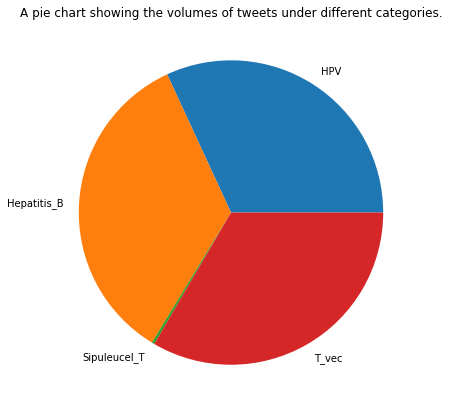

In [ ]:
'''A pie chart to show the total number of tweets in each category'''

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show() 

<ipython-input-42-15256d8c9aaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(2).index, inplace=True)


Text(0, 0.5, 'total tweets')

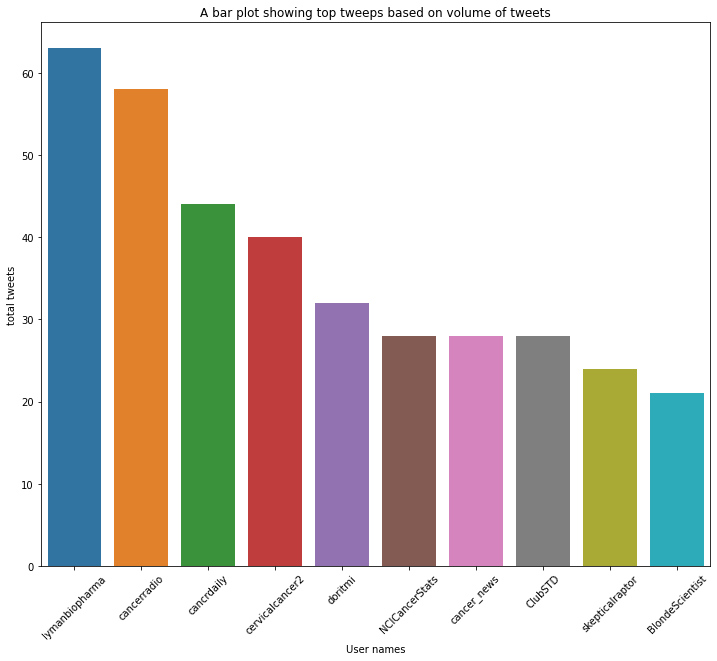

In [ ]:
''' Users with most tweets'''

d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('total tweets')

<ipython-input-43-4ac3c832cdcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'HPV tweets')

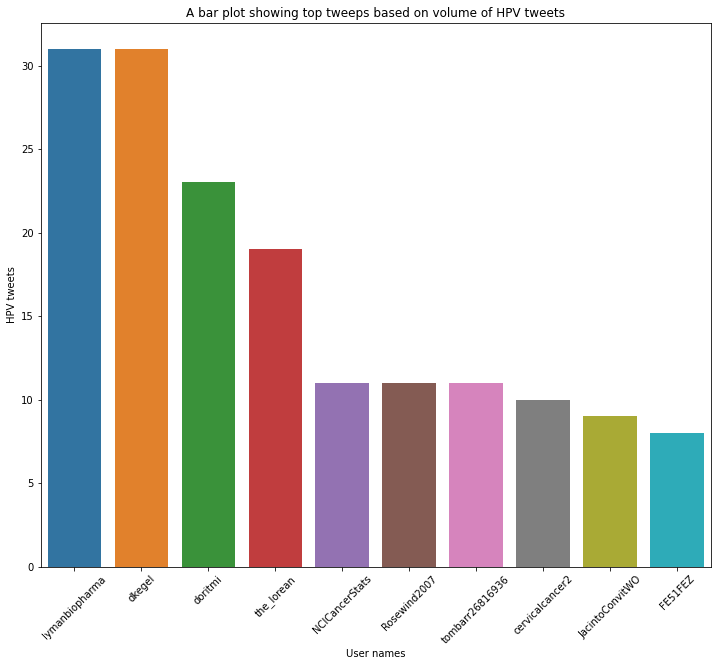

In [ ]:
''' Users with most HPV tweets'''

d = pivot_clusters.sort_values(by = 'HPV', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.HPV)
plt.title('A bar plot showing top tweeps based on volume of HPV tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('HPV tweets')

<ipython-input-44-46f8a89803db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(2).index, inplace=True)


Text(0, 0.5, 'Hepatitis_B tweets')

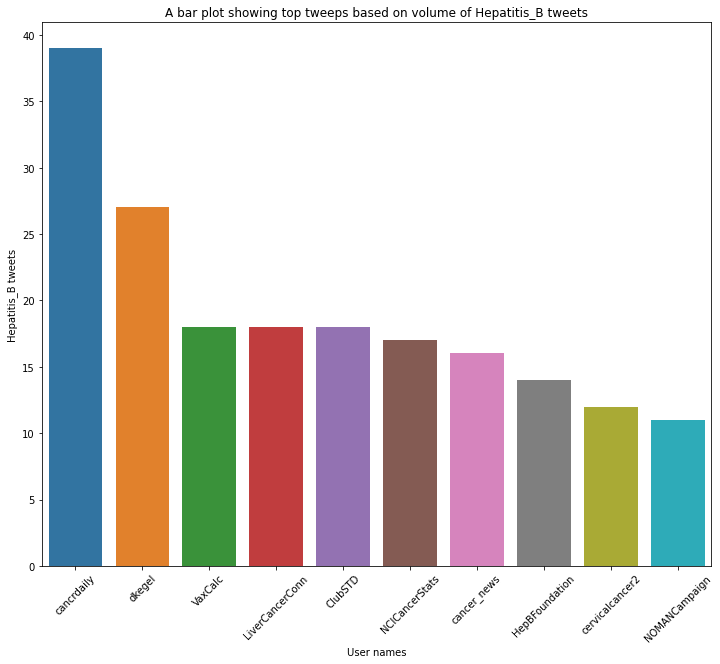

In [ ]:
''' Users with most Hepatitis_B tweets'''

d = pivot_clusters.sort_values(by = 'Hepatitis_B', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.Hepatitis_B)
plt.title('A bar plot showing top tweeps based on volume of Hepatitis_B tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Hepatitis_B tweets')

<ipython-input-45-6d1f6e9aa7ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(1).index, inplace=True)


Text(0, 0.5, 'Sipuleucel-T tweets')

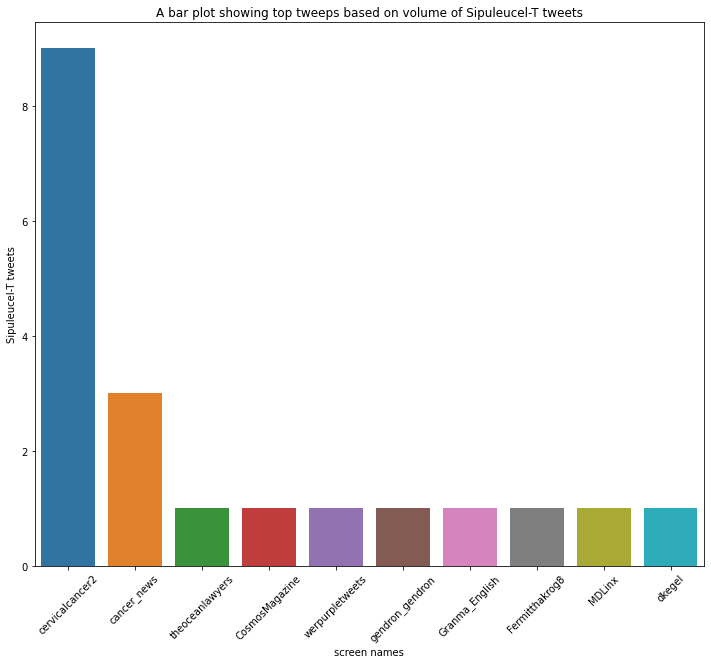

In [ ]:
''' Users with most Sipuleucel tweets'''

d = pivot_clusters.sort_values(by = 'Sipuleucel_T', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.Sipuleucel_T)
plt.title('A bar plot showing top tweeps based on volume of Sipuleucel-T tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('Sipuleucel-T tweets')

<ipython-input-46-6c657441c4f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e.drop(e.head(2).index, inplace=True)


Text(0, 0.5, 'T_vec tweets')

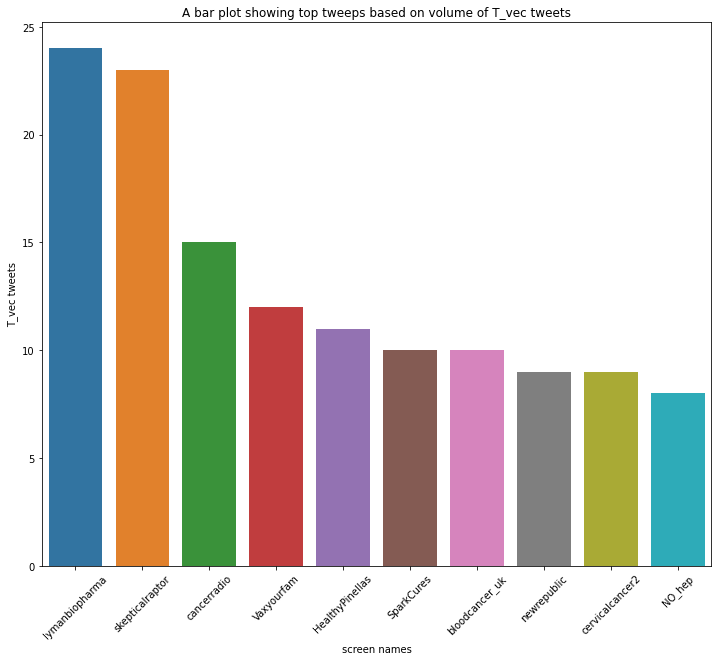

In [ ]:
''' Users with most T_vec tweets'''

d = pivot_clusters.sort_values(by = 'T_vec', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.T_vec)
plt.title('A bar plot showing top tweeps based on volume of T_vec tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('T_vec tweets')

In [ ]:
# Distribution test and skewness

In [ ]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

In [ ]:
# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(10589, 5)
(10588, 5)


<ipython-input-50-6f9beb46b5ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters.HPV , fit=norm);



 mu = 0.39 and sigma = 0.84



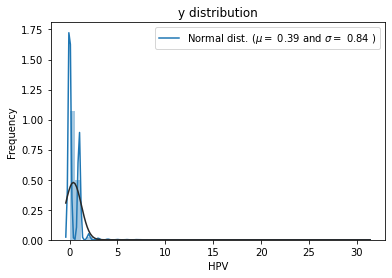

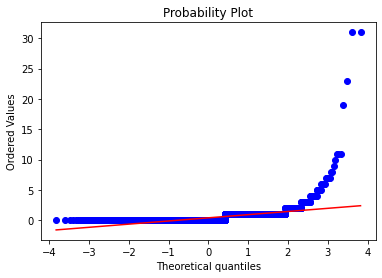

In [ ]:
# Target variable
sns.distplot(pivot_clusters.HPV , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.HPV)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('HPV tweets distribution plot')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.HPV, plot=plt)
plt.show()

<ipython-input-51-8f27ace8be5a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters.Hepatitis_B , fit=norm);



 mu = 0.43 and sigma = 0.99



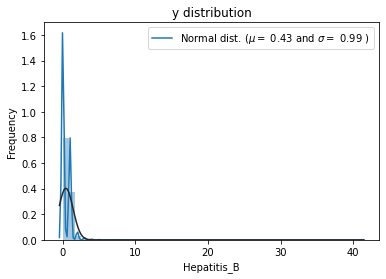

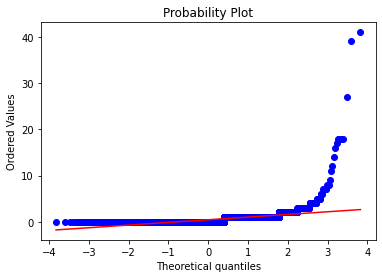

In [ ]:
# Target variable
sns.distplot(pivot_clusters.Hepatitis_B , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.Hepatitis_B)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Hepatitis_B tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.Hepatitis_B, plot=plt)
plt.show()

<ipython-input-52-8dd6027d3b73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters.Sipuleucel_T , fit=norm);



 mu = 0.00 and sigma = 0.10



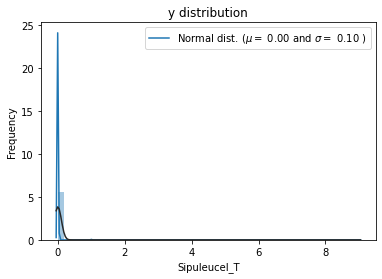

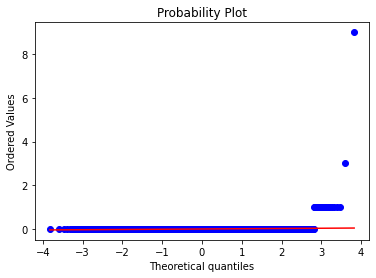

In [ ]:
# Target variable
sns.distplot(pivot_clusters.Sipuleucel_T , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.Sipuleucel_T)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Sipuleucel_T tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.Sipuleucel_T, plot=plt)
plt.show()

<ipython-input-53-491e395765e7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pivot_clusters.T_vec , fit=norm);



 mu = 0.41 and sigma = 0.81



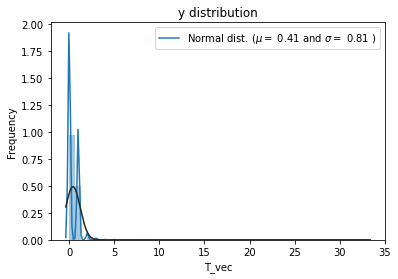

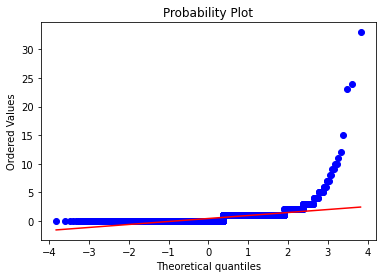

In [ ]:
# Target variable
sns.distplot(pivot_clusters.T_vec , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.T_vec)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('T_vec tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.T_vec, plot=plt)
plt.show()

KMeans Clustering.

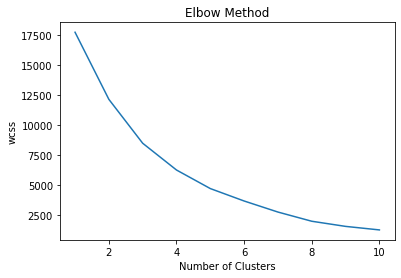

In [ ]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['HPV', 'Hepatitis_B']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

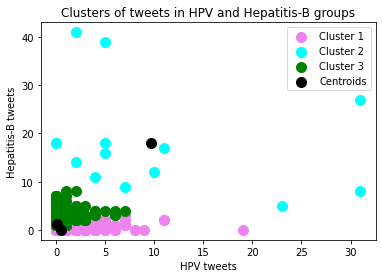

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in HPV and Hepatitis-B groups')
plt.xlabel('HPV tweets')
plt.ylabel('Hepatitis-B tweets')
plt.legend()
plt.show()

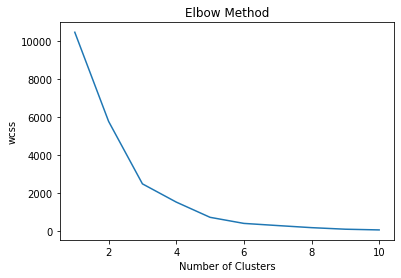

In [ ]:
# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['Hepatitis_B', 'Sipuleucel_T']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

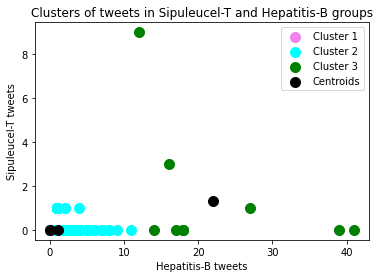

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in Sipuleucel-T and Hepatitis-B groups')
plt.xlabel('Hepatitis-B tweets')
plt.ylabel('Sipuleucel-T tweets')
plt.legend()
plt.show()

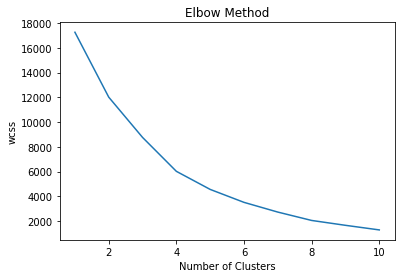

In [ ]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['Hepatitis_B', 'T_vec']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

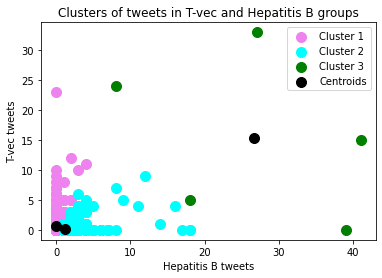

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in T-vec and Hepatitis B groups')
plt.xlabel('Hepatitis B tweets')
plt.ylabel('T-vec tweets')
plt.legend()
plt.show()

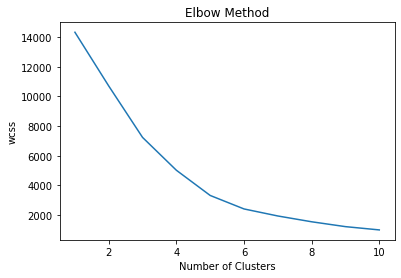

In [ ]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['HPV', 'T_vec']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

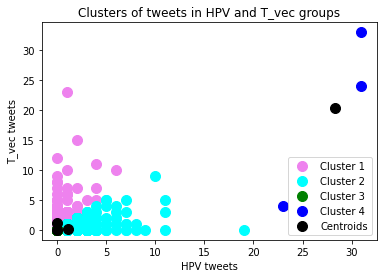

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in HPV and T_vec groups')
plt.xlabel('HPV tweets')
plt.ylabel('T_vec tweets')
plt.legend()
plt.show()

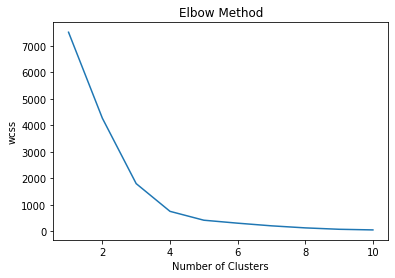

In [ ]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['HPV', 'Sipuleucel_T']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

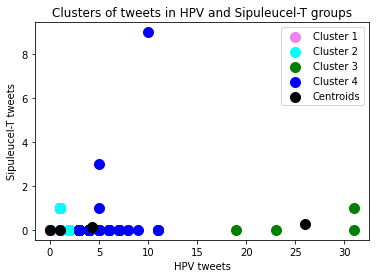

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in HPV and Sipuleucel-T groups')
plt.xlabel('HPV tweets')
plt.ylabel('Sipuleucel-T tweets')
plt.legend()
plt.show()

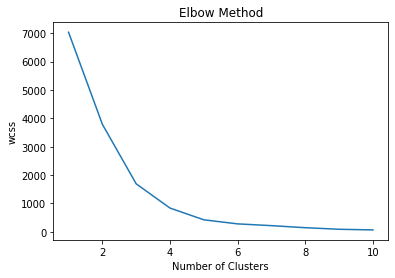

In [ ]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['T_vec', 'Sipuleucel_T']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

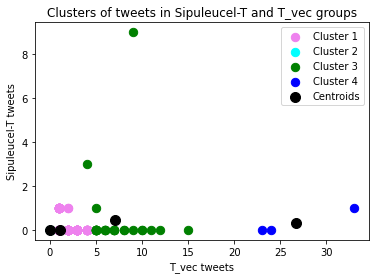

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=70, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in Sipuleucel-T and T_vec groups')
plt.xlabel('T_vec tweets')
plt.ylabel('Sipuleucel-T tweets')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
seg = pivot_clusters.copy()
# seg = seg.drop

pca = PCA()
pca.fit(seg)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([7.56238360e-01, 1.41359139e-01, 1.00145461e-01, 2.25704046e-03,
       1.79349269e-30])

Text(0, 0.5, 'cummulative explained variance')

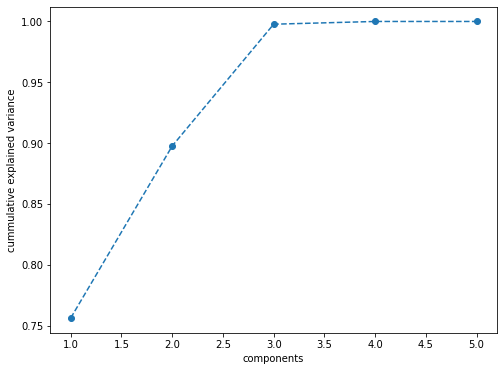

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

In [ ]:
pca = PCA(n_components = 2)
pca.fit(seg)

PCA(n_components=2)

In [ ]:
scores = pca.transform(seg)

Text(0, 0.5, 'wcss')

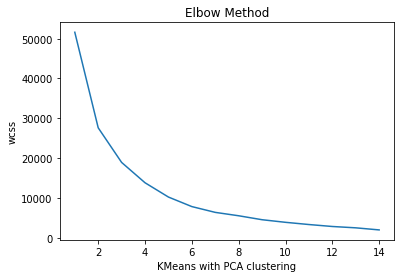

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

In [ ]:
n = 4
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

In [ ]:
c.tail()

,HPV,Hepatitis_B,Sipuleucel_T,T_vec,total,component1,component2,segment_kmeans_pca
10583,0,1,0,0,1,-0.211916,0.816662,3
10584,0,1,0,0,1,-0.211916,0.816662,3
10585,0,0,0,1,1,-0.316683,-0.387486,3
10586,1,0,0,0,1,-0.294969,-0.420856,3
10587,0,1,0,0,1,-0.211916,0.816662,3


Text(0.5, 1.0, 'Clusters by PCA')

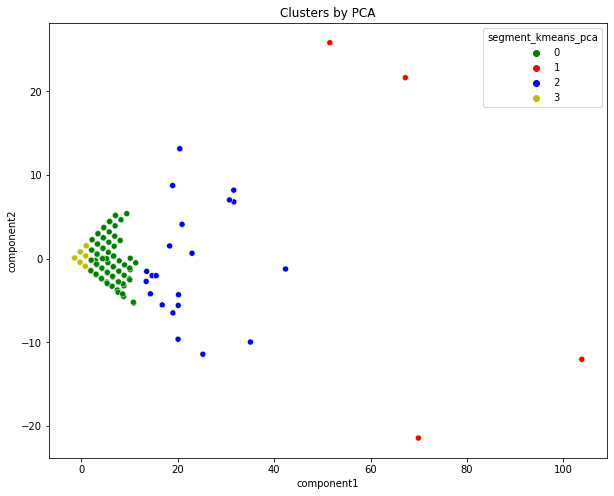

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette = ['g', 'r', 'b', 'y'])
plt.title('Clusters by PCA')